# Imports

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Reading Data

In [20]:
mnist_train = pd.read_csv("/mnist_train.csv")
mnist_test = pd.read_csv("/mnist_test.csv")

In [21]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now to separate the labels from pixel intensities and digit data

In [22]:
y_train = mnist_train["label"].copy().to_numpy()
X_train = mnist_train.drop(columns=["label"]).to_numpy()

print("The training digits data:\n", X_train)
print("Digit labels: ", y_train)

# Similarly for the test set
y_test = mnist_test["label"].copy().to_numpy()
X_test = mnist_test.drop(columns=["label"]).to_numpy()

The training digits data:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Digit labels:  [5 0 4 ... 5 6 8]


# Visualization

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

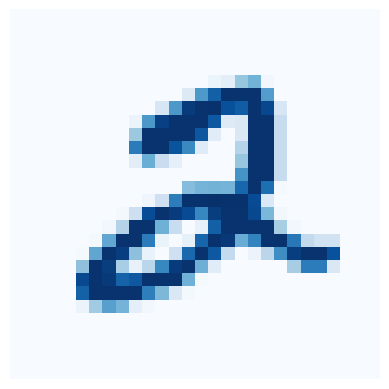

In [24]:
some_digit_data = X_train[5]
some_digit_image = some_digit_data.reshape(28, 28)

# imshow plots the matrix
plt.imshow(some_digit_image, cmap=plt.cm.Blues)
plt.axis("off")
plt.show()

Check corresponding label:

In [25]:
print(y_train[5])

2


Time to create a function to plot the digits

In [26]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)

        digit = data[i]
        digit_image = digit.reshape(28, 28)

        plt.imshow(digit_image, cmap=plt.cm.Blues)
        plt.axis("off")

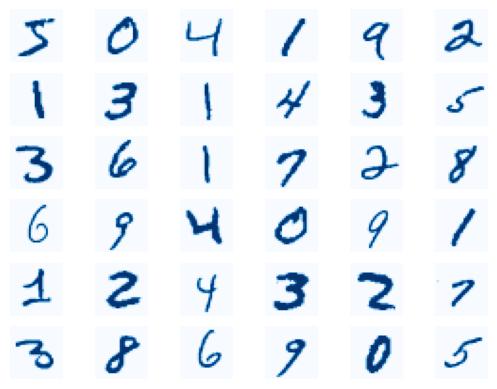

In [27]:
plot_digits(X_train[:36], row_size=6)
plt.show()

# K-Nearest Neighbors Model Training

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# train the classifier
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
# Predicting on some digit
knn.predict([some_digit_data])

array([2])

# Evaluate via confusion matrix + cross validation

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# our predictions using cross validation on training set
knn_preds = cross_val_predict(knn, X_train, y_train, cv=3)

In [31]:
knn_preds


array([5, 0, 4, ..., 5, 6, 8])

Time for a conufusion matrix

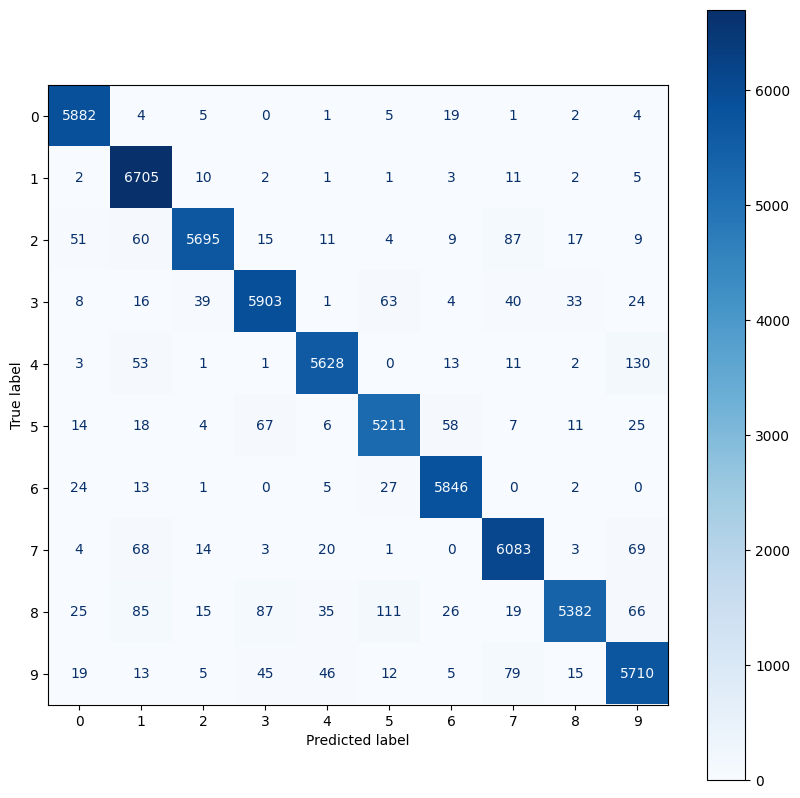

In [32]:
# Build the confusion matrix
cf_mat = confusion_matrix(y_train, knn_preds)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

If the matrix was perfect, all the cells would be 0 other than the diagonal

In [33]:
from sklearn.metrics import classification_report

def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

In [34]:
class_report(y_train, knn_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.975133  0.993078  0.984023      5923
           1   0.953092  0.994512  0.973361      6742
           2   0.983762  0.955858  0.969609      5958
           3   0.964070  0.962812  0.963441      6131
           4   0.978102  0.963369  0.970680      5842
           5   0.958786  0.961262  0.960022      5421
           6   0.977102  0.987834  0.982438      5918
           7   0.959766  0.970950  0.965326      6265
           8   0.984092  0.919843  0.950883      5851
           9   0.945051  0.959825  0.952381      5949

    accuracy                       0.967417     60000
   macro avg   0.967896  0.966934  0.967216     60000
weighted avg   0.967676  0.967417  0.967345     60000



# Adding Grid search technique to find hyperparam

In [36]:
from sklearn.model_selection import GridSearchCV

space = [
    {"weights": ["uniform", "distance"],
     "n_neighbors": [2, 3, 5, 7]
    } ]

knn_grid_search = GridSearchCV(knn, param_grid=space, cv=3, scoring="accuracy", n_jobs=2, verbose=2)
knn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'n_neighbors': [2, 3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=2)

## Best model performance

In [37]:
print(knn_grid_search.best_estimator_)

KNeighborsClassifier(n_neighbors=3, weights='distance')


Print results from grid search

In [38]:
# convert the cv_results dict into pandas dataframe
cvres = pd.DataFrame.from_dict(knn_grid_search.cv_results_)
cvres

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.401013,0.175253,72.622643,0.431611,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.95965,0.96040,0.96160,0.960550,0.000803,8
1,0.141841,0.011874,69.201585,1.099806,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.96875,0.96685,0.96705,0.967550,0.000852,4
2,0.134730,0.010740,74.185868,1.199827,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.96900,0.96805,0.96750,0.968183,0.000620,3
3,0.150074,0.001325,71.997373,0.075028,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.97040,0.96890,0.96870,0.969333,0.000759,1
4,0.132610,0.008556,75.557570,0.696817,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.96760,0.96710,0.96755,0.967417,0.000225,5
5,0.136494,0.013104,70.285371,1.854563,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.96880,0.96795,0.96905,0.968600,0.000471,2
6,0.139655,0.005246,68.717883,0.437192,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.96490,0.96460,0.96610,0.965200,0.000648,7
7,0.129040,0.004801,69.654236,1.470875,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.96700,0.96560,0.96740,0.966667,0.000772,6


In [39]:
knn_tuned = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

# Accuracy

In [40]:
y_test_preds = knn_tuned.predict(X_test)

In [41]:
class_report(y_test, y_test_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.973027  0.993878  0.983342       980
           1   0.965899  0.998238  0.981802      1135
           2   0.984205  0.966085  0.975061      1032
           3   0.966303  0.965347  0.965825      1010
           4   0.976313  0.965377  0.970814       982
           5   0.964126  0.964126  0.964126       892
           6   0.981289  0.985386  0.983333       958
           7   0.962246  0.966926  0.964580      1028
           8   0.987166  0.947639  0.966998       974
           9   0.958457  0.960357  0.959406      1009

    accuracy                       0.971700     10000
   macro avg   0.971903  0.971336  0.971529     10000
weighted avg   0.971811  0.971700  0.971663     10000



Hyperparameters were increased and accuracy is now 97%